# Prova módulo 4

e-mail pra envio: afjmdm@hotmail.com

Enviar com o assunto [PROVA - MÓDULO 4], colocar o nome completo no corpo do e-mail, e tamvbém no título do notebook

### Por favor, enviar o notebook rodado :)

_____

In [2]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Operário

O tempo T, em minutos, necessário para um operário processar certa peça é uma v.a. com a seguinte distribuição de probabilidade
```
t	2	3	4	5	6	7  
p(t)	0.1	0.1	0.3	0.2	0.2	0.1     
```
(a) Como você definiria uma distribuição de probabilidade?

(b) A distribuição acima é contínua ou discreta?

(c) Calcule o tempo médio de processamento.
(Dica: lembre-se que a média de uma variável aleatória é seu valor esperado!)

(d) Para cada peça processada, o operário ganha um fixo de 2,00, mas, se ele processa a peça em menos de seis minutos, ganha 0,50 em cada minuto poupado. Por exemplo, se ele processa a peça em quatro minutos, recebe a quantia adicional de 1,00. Calcule o ganho médio desse operário POR PEÇA.
(Dica: construa uma nova variável aleatória a partir da variável aleatória de tempo de produção da peça!)

(a) Como você definiria uma distribuição de probabilidade?   
Uma distribuição de probabilidade é uma função de estatistica com que pode descrever todos os possivéis valores de um certo  range. Ela é baseade numa distribuição(normal/uniform/poisson/t_student..) Esses distribuições podem ser definidos pelo mean (average), standard deviation, skewness e kurtosis


(b) A distribuição acima é contínua ou discreta?
Ela é discreta, são 7 execuções então uma execução é categorico portanto é discreta.

(c) Calcule o tempo médio de processamento.   
A esperança de uma V.A. $X$ é obtida multiplicando-se cada valor de   
$X = x_i$, $i = 1,..,n$, por sua respectiva probabilidade $P[X = x_i]$, e somando os produtos resultantes:   
   
$E(X) = \sum_{i=1}^n x_i P[X = x_i]$

0    4.0
1    3.5
2    3.0
3    2.5
4    2.0
5    2.0
Name: tempos, dtype: float64

In [59]:
df = pd.DataFrame({'tempos': [2,3,4,5,6,7],
                   'probabilidade': [0.1, 0.1, 0.3, 0.2, 0.2, 0.1 ]})
df['mul'] = np.multiply(df['tempos'] , df['probabilidade']) #2 + np.min(6,x)-6 * 0.5
#df['add'] = df['tempos'].apply(lambda x: 2 + (6-np.min(6,x)) * 0.5)
df['add'] = df['tempos'].apply(lambda x: 2 if x >= 6 else 2 + (6-x) * 0.5)
df['muladd'] = np.multiply(df['add'] , df['probabilidade'])
print(df)
print(df['mul'].sum(),df['mul'].std(ddof=0), df['muladd'].sum())

   tempos  probabilidade  mul  add  muladd
0       2            0.1  0.2  4.0    0.40
1       3            0.1  0.3  3.5    0.35
2       4            0.3  1.2  3.0    0.90
3       5            0.2  1.0  2.5    0.50
4       6            0.2  1.2  2.0    0.40
5       7            0.1  0.7  2.0    0.20
4.6000000000000005 0.4027681991198191 2.75


<BarContainer object of 6 artists>

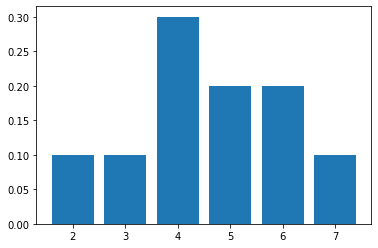

In [15]:
plt.bar(df.tempos, df.probabilidade)

        Column1
count  6.000000
mean   0.766667
std    0.441210
min    0.200000
25%    0.400000
50%    0.850000
75%    1.150000
max    1.200000


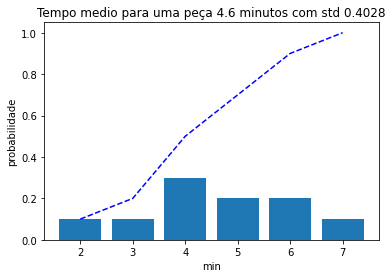

In [31]:
# Valores manuais
tempos = np.array([2,	3,	4,	5,	6,	7])
valores = np.array([0.1,	0.1,	0.3,	0.2,	0.2,	0.1])
adicional = np.array([4,	3.5,	3.0,	2.5,	2,	2])
plt.bar(x=tempos, height=valores)
cum = np.cumsum(valores)                 # CDF e PDF não funcionam para distribuições discretas
print(pd.DataFrame({'Column1':np.multiply(tempos,valores)}).describe())
pmf = cum / np.amax(cum)
plt.plot(tempos,pmf,'b--', label="PMF")
plt.xlabel('min')
plt.ylabel('probabilidade')
plt.title(f"Tempo medio para uma peça {np.round(np.multiply(tempos,valores).sum(),1)} minutos com std {np.round(np.multiply(tempos,valores).std(),4)}")
plt.show()
# print(f"Tempo medio para uma peça {valores.mean()}")

(d) Para cada peça processada, o operário ganha um fixo de 2,00, mas, se ele processa a peça em menos de seis minutos, ganha 0,50 em cada minuto poupado. Por exemplo, se ele processa a peça em quatro minutos, recebe a quantia adicional de 1,00. Calcule o ganho médio desse operário POR PEÇA.

In [61]:
print(f"O ganho médio desse operário POR PEÇA: $R {np.round(np.multiply(adicional,valores).sum(),2)}")

O ganho médio desse operário POR PEÇA: $R 2.75


______

## Controle Qualidade

Um fabricante garante que 90% das peças que fornecem à linha de produção de uma determinada fábrica estão de acordo com as especificações exigidas. A análise de uma amostra de 200 peças revelou 25 defeituosas. A um nível de 5%, podemos dizer que é verdadeira a afirmação do fabricante?

### Definição das hipóteses

$$
    H_0: \mu \geq 90\, \%
$$

$$
    H_1 : \mu < 90 \, \%
$$

In [71]:
from scipy.stats import norm
import matplotlib.pyplot as plt


a media de estudantes tem 150cm com um std de 20cm. 
Darnell tem altura de 161.4cm quantos porcent dos alunas são menores que o Darnell?

In [76]:
norm.cdf(x=161.4,loc=150, scale=20)

0.7156611509536759

In [124]:
norm.cdf(x=380,loc=300, scale=50)

0.945200708300442

In [125]:
norm.cdf(x=26,loc=20.66, scale=2)

0.9962074376523146

A set of geography exam scores are normally distributed with a mean of 75 points and a standard deviation of 10 points. Areum got a score of 76 points on the exam.

In [126]:
norm.cdf(x=76,loc=75, scale=10)

0.539827837277029

A set of middle school student heights are normally distributed with a mean of 150 centimeters and a standard deviation of 20 centimeters. Darnell is a middle school student with a height of 161.4 centimeters.

In [86]:
norm.sf(x=161.4,loc=150, scale=20)

0.28433884904632406

0.7156611509536759

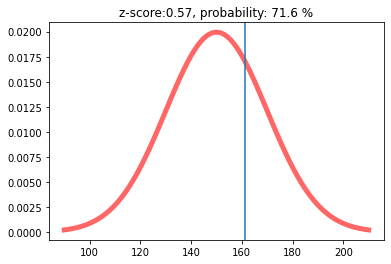

In [123]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(90,210, 100)
ax.plot(x, norm.pdf(x=x,loc=150, scale=20), 'r-', lw=5, alpha=0.6, label='norm pdf')
ax.axvline(161.4)
mu = 150
std = 20
darnell = 161.4
z = (darnell-mu)/std
plt.title(f"z-score:{z:0.2f}, probability: {(norm.cdf(0.57)*100):0.1f} %")
norm.cdf(0.57)

In [69]:
mu = 150
std = 20
darnell = 161.4
z = (darnell-mu)/std
z


0.5700000000000003

deviations above the mean 0.57

In [66]:
norm.cdf(0.57)

0.7156611509536759

In [87]:
norm.sf(x=161.4,loc=150, scale=20)

0.28433884904632406

In [32]:
norm.cdf(x=90,loc=76, scale=10)-norm.cdf(x=63,loc=76, scale=10)

0.8224428561806185

In [33]:
norm.cdf(x=14.9,loc=16.3, scale=2)-norm.cdf(x=12.9,loc=16.3, scale=2)

0.19739818946452997

In [34]:
norm.cdf(x=171,loc=170.4, scale=10)-norm.cdf(x=145,loc=170.4, scale=10)

0.518379559211024

A set of history exam scores are normally distributed with a mean of 83.2 points 
and a standard deviation of 8 points.    
What proportion of exam scores are between 82 and 89.2 points?

In [36]:
norm.cdf(x=89.2,loc=83.2, scale=8)-norm.cdf(x=82,loc=83.2, scale=8)

0.3329903399933744

A set of statistics exam scores are normally distributed with a mean of 76.55 points 
and a standard deviation of 5 points.    
What proportion of exam scores are between 79 and 86.05 points?

In [35]:
norm.cdf(x=86.05,loc=76.55, scale=5)-norm.cdf(x=79,loc=76.55, scale=5)

-0.2833503896013885

A set of average city temperatures in October are normally distributed with a mean of $20.6 ^\circ \text{C}$
 and a standard deviation of $2 ^\circ \text{C}$.
What proportion of temperatures are between $18^\circ \text{C}$ and $20.6^\circ \text{C}$?

In [37]:
norm.cdf(x=20.6,loc=20.6, scale=2)-norm.cdf(x=18,loc=20.6, scale=2)

0.4031995154143897

A set of elementary school student heights are normally distributed with a mean of 105 centimeters and a standard deviation of 7 centimeters.
What proportion of student heights are between 94.5cm and 115.5 centimeters?

In [38]:
norm.cdf(x=115.5,loc=105, scale=7)-norm.cdf(x=94.5,loc=105, scale=7)

0.8663855974622838

A set of average city temperatures in October are normally distributed with a mean of $21.25 ^\circ \text{C}$
 and a standard deviation of $2 ^\circ \text{C}$.
What proportion of temperatures are between $19.63^\circ \text{C}$ and $20.53^\circ \text{C}$?

In [39]:
norm.cdf(x=20.53,loc=21.25, scale=2)-norm.cdf(x=19.63,loc=21.25, scale=2)

0.15045347891040756

In [30]:
norm.cdf(x=90,loc=76, scale=10)

0.9192433407662289

In [31]:
norm.cdf(x=63,loc=76, scale=10)

0.09680048458561036

Text(0.5, 1.0, '-1.6667 lower score')

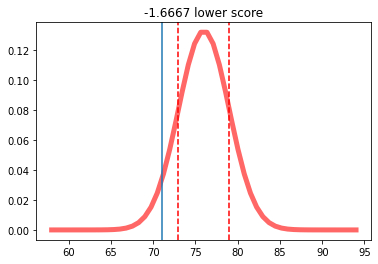

In [40]:

mu=76
std=3
Irina=71
fig, ax = plt.subplots(1, 1)
x = np.linspace(int(mu-(6*std)), mu + int(6*std))
ax.plot(x, norm.pdf(x=x,loc=mu, scale=std), 'r-', lw=5, alpha=0.6, label='norm pdf')
ax.axvline(Irina)
ax.axvline(int(mu-(1*std)), color='r', linestyle='--')
ax.axvline(mu + int(1*std), color='r', linestyle='--')
plt.title(f"{norm.ppf(norm.cdf(x=Irina,loc=mu, scale=std)):0.4f} lower score")

71 percent estão menores que Darnell 
e 28.4 porcent esão maiores

In [68]:
norm.ppf(0.7156611509536759)

0.5700000000000002

A set of laptop prices are normally distributed with a mean of 750 dollars and a standard deviation of 60 dollars.
What proportion of laptop prices are between 624 dollars and 768 dollars?

z_score 768 0.6179,z_score_624 0.0179
The area between is z_score 768 - z_score 624 == 0.600047001626136, 0.25346876292349113


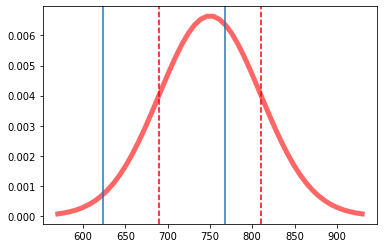

In [140]:
mu=750
std=60
fig, ax = plt.subplots(1, 1)
x = np.linspace(int(mu-(3*std)), mu + int(3*std))
ax.plot(x, norm.pdf(x=x,loc=mu, scale=std), 'r-', lw=5, alpha=0.6, label='norm pdf')
ax.axvline(624)
ax.axvline(768)
ax.axvline(int(mu-(1*std)), color='r', linestyle='--')
ax.axvline(mu + int(1*std), color='r', linestyle='--')
z_score_624 = norm.cdf(x=624,loc=mu, scale=std)
z_score_768 = norm.cdf(x=768,loc=mu, scale=std)
print(f"z_score 768 {z_score_768:0.4f},z_score_624 {z_score_624:0.4f}")
print(f"The area between is z_score 768 - z_score 624 == {z_score_768-z_score_624}, {norm.ppf(z_score_768-z_score_624)}")


In [88]:
p=0.05
n=200
mu=180
variancia = 25
zPrometido = norm.ppf(0.90)
std = np.sqrt(variancia)
z = (desvio_amostral - mu)/std
p_hat = norm.cdf(z)
#Tome uma decisão
if p > p_hat:
    print("Rejeição da H_0! " + str(p_hat))
else:
    print("Falha em rejeitar H_0! " + str(p_hat))

Rejeição da H_0! 2.6952500812001938e-211


In [67]:
n=200
significancia=0.05
confianca = 1 - significancia
media_amostral = 200
desvio_amostral = 25
# erro padrão

SE = desvio_amostral / np.sqrt(n)
# Check das condições do TCL
print(n>=30)

z = (media_amostral - mu)/SE
z
#Calcule o p-value
p_value = norm.sf(z)*2
print(p_value)
p_hat = (200-25)/200
#Tome uma decisão
if p_value > p_hat:
    print("Rejeição da H_0!")
else:
    print("Falha em rejeitar H_0!")




True
0.0
Falha em rejeitar H_0!


A set of physics exam scores are normally distributed with a mean of 80 points and a standard deviation of 6 points. Irina got a score of 95 points on the exam.

Text(0.5, 1.0, '0.9938 lower score')

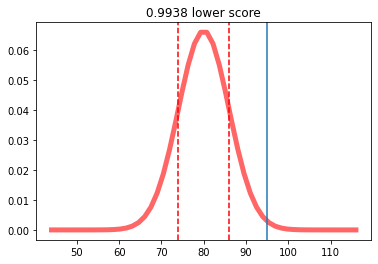

In [152]:
mu=80
std=6
Irina=95
fig, ax = plt.subplots(1, 1)
x = np.linspace(int(mu-(6*std)), mu + int(6*std))
ax.plot(x, norm.pdf(x=x,loc=mu, scale=std), 'r-', lw=5, alpha=0.6, label='norm pdf')
ax.axvline(Irina)
ax.axvline(int(mu-(1*std)), color='r', linestyle='--')
ax.axvline(mu + int(1*std), color='r', linestyle='--')
plt.title(f"{norm.cdf(x=Irina,loc=mu, scale=std):0.4f} lower score")

______

A set of average city temperatures in April
 are normally distributed with a mean of $19.7 ^\circ \text{C}$ 
 and a standard deviation of $2 ^\circ \text{C}$ .    
 The average temperature of Cairo is $21.4 ^\circ \text{C}$.

Text(0.5, 1.0, '0.1977 higher score')

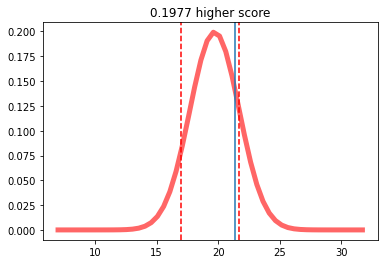

In [155]:
mu=19.7
std=2
Cairo=21.4
fig, ax = plt.subplots(1, 1)
x = np.linspace(int(mu-(6*std)), mu + int(6*std))
ax.plot(x, norm.pdf(x=x,loc=mu, scale=std), 'r-', lw=5, alpha=0.6, label='norm pdf')
ax.axvline(Cairo)
ax.axvline(int(mu-(1*std)), color='r', linestyle='--')
ax.axvline(mu + int(1*std), color='r', linestyle='--')
plt.title(f"{norm.sf(x=Cairo,loc=mu, scale=std):0.4f} higher score")

The Appalachian Trail is a long hiking trail that takes several months to travel by foot. 
Hikers sometimes change sleeping bags during the trip because of changing seasons.
Each sleeping bag has a rating telling the minimum outside temperature in which it is effective. 
Here are some summary statistics for the ratings for the sleeping bags hikers were using at the beginning and end of their trip:   

|Time|	Mean rating|	Standard deviation|
|-----|------|------|
|Beginning|	$\mu=21^{\circ}\text{F}$ | $\sigma=11^{\circ}\text{F}$ |
|End|		$\mu=32^{\circ}\text{F}$ | $\sigma=12.9^{\circ}\text{F}$ |   

Irina used a sleeping bag rated $15^{\circ}\text{F}$ at the beginning of the trip 
and a sleeping bag rated $29^{\circ}\text{F}$ at the end of her trip on the Appalachian Trail.
Relative to other sleeping bags hikers were using at the time,   
which of Irina's sleeping bags had a relatively lower rating?

Text(0.5, 1.0, '0.7073 higher score')

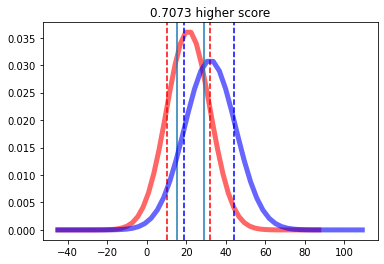

In [64]:
mu1=21
std1=11
mu2=32
std2=12.9
Begin=15
End=29
fig, ax = plt.subplots(1, 1)
x = np.linspace(int(mu1-(6*std1)), mu1 + int(6*std1))
ax.plot(x, norm.pdf(x=x,loc=mu1, scale=std1), 'r-', lw=5, alpha=0.6, label='norm pdf')
ax.axvline(Begin)
ax.axvline(int(mu1-(1*std1)), color='r', linestyle='--')
ax.axvline(mu1 + int(1*std1), color='r', linestyle='--')
x = np.linspace(int(mu2-(6*std2)), mu2 + int(6*std2))
ax.plot(x, norm.pdf(x=x,loc=mu2, scale=std2), 'b-', lw=5, alpha=0.6, label='norm pdf')
ax.axvline(End)
ax.axvline(int(mu2-(1*std2)), color='b', linestyle='--')
ax.axvline(mu2 + int(1*std2), color='b', linestyle='--')
plt.title(f"{norm.sf(x=Begin,loc=mu1, scale=std1):0.4f} higher score")

A set of high school student heights are normally distributed with a mean of 161cm 
and a standard deviation of 15 centimeters.   
Mikio is a high school student with a height of 191 centimeters.     
What proportion of student heights are higher than Mikio's height?   

Text(0.5, 1.0, '0.0228 higher score')

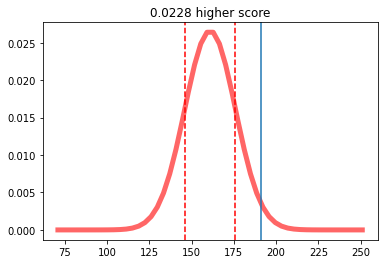

In [156]:
mu=161
std=15
Mikio=191
fig, ax = plt.subplots(1, 1)
x = np.linspace(int(mu-(6*std)), mu + int(6*std))
ax.plot(x, norm.pdf(x=x,loc=mu, scale=std), 'r-', lw=5, alpha=0.6, label='norm pdf')
ax.axvline(Mikio)
ax.axvline(int(mu-(1*std)), color='r', linestyle='--')
ax.axvline(mu + int(1*std), color='r', linestyle='--')
plt.title(f"{norm.sf(x=Mikio,loc=mu, scale=std):0.4f} higher score")

A set of average city temperatures in July are normally distributed with a mean of $23.5 ^\circ \text{C}$
and a standard deviation of $2 ^\circ \text{C}$. 
The average temperature of Rabat is $23 ^\circ \text{C}$.     
What proportion of average city temperatures are higher than that of Rabat?   

Text(0.5, 1.0, '0.5987 higher score')

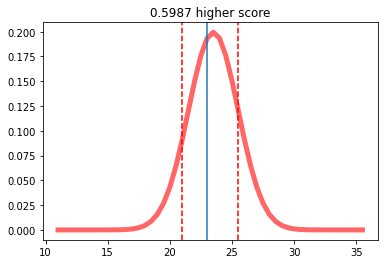

In [157]:
mu=23.5
std=2
Rabat=23
fig, ax = plt.subplots(1, 1)
x = np.linspace(int(mu-(6*std)), mu + int(6*std))
ax.plot(x, norm.pdf(x=x,loc=mu, scale=std), 'r-', lw=5, alpha=0.6, label='norm pdf')
ax.axvline(Rabat)
ax.axvline(int(mu-(1*std)), color='r', linestyle='--')
ax.axvline(mu + int(1*std), color='r', linestyle='--')
plt.title(f"{norm.sf(x=Rabat,loc=mu, scale=std):0.4f} higher score")

A set of computer science exam scores are normally distributed with a mean of 71.33 points 
and a standard deviation of 3 points.      
What proportion of exam scores are between 68 and 77.99 points?

z_score 77.99 0.9868,z_score_ 68.0 0.1335
The area between is z_score 77.99 - z_score_ 68.0 == 0.8532911029499963


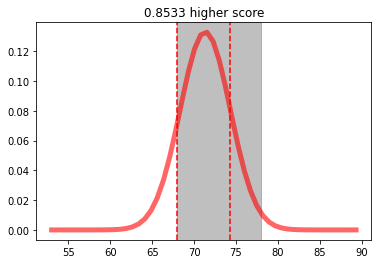

In [175]:
mu=71.33
std=3
P1=68.0
P2=77.99
z_score_P1 = norm.cdf(x=P1,loc=mu, scale=std)
z_score_P2 = norm.cdf(x=P2,loc=mu, scale=std)
fig, ax = plt.subplots(1, 1)
x = np.linspace(int(mu-(6*std)), mu + int(6*std))
ax.plot(x, norm.pdf(x=x,loc=mu, scale=std), 'r-', lw=5, alpha=0.6, label='norm pdf')
ax.axvspan(P1, P2, alpha=0.5, color='grey')
ax.axvline(int(mu-(1*std)), color='r', linestyle='--')
ax.axvline(mu + int(1*std), color='r', linestyle='--')
plt.title(f"{(z_score_P2-z_score_P1):0.4f} higher score")

print(f"z_score {P2} {z_score_P2:0.4f},z_score_ {P1} {z_score_P1:0.4f}")
print(f"The area between is z_score {P2} - z_score_ {P1} == {z_score_P2-z_score_P1}")


A set of elementary school student heights are normally distributed with a mean of 105 centimeters
 and a standard deviation of 5 centimeters.
What proportion of student heights are between 93 centimeters and 100.5 centimeters?

z_score 100.5 0.1841,z_score_ 93 0.0082
The area between is z_score 100.5 - z_score_ 93 == 0.17586258942216335


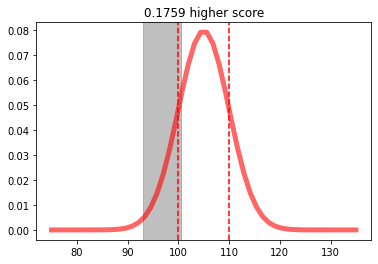

In [176]:
mu = 105
std=5
P1=93
P2=100.5

z_score_P1 = norm.cdf(x=P1,loc=mu, scale=std)
z_score_P2 = norm.cdf(x=P2,loc=mu, scale=std)
fig, ax = plt.subplots(1, 1)
x = np.linspace(int(mu-(6*std)), mu + int(6*std))
ax.plot(x, norm.pdf(x=x,loc=mu, scale=std), 'r-', lw=5, alpha=0.6, label='norm pdf')
ax.axvspan(P1, P2, alpha=0.5, color='grey')
ax.axvline(int(mu-(1*std)), color='r', linestyle='--')
ax.axvline(mu + int(1*std), color='r', linestyle='--')
plt.title(f"{(z_score_P2-z_score_P1):0.4f} higher score")

print(f"z_score {P2} {z_score_P2:0.4f},z_score_ {P1} {z_score_P1:0.4f}")
print(f"The area between is z_score {P2} - z_score_ {P1} == {z_score_P2-z_score_P1}")

A set of electric toothbrush prices are normally distributed with a mean of 87 dollars    
and a standard deviation of 8 dollars.
What proportion of electric toothbrush prices are between 104.60 dollars and 108.20 dollars?

C:\Users\br080d\AppData\Local\Temp/ipykernel_16752/2617456030.py:15: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate('This is awesome!',


z_score 108.2 0.9960,z_score_ 104.6 0.9861
The area between is z_score 108.2 - z_score_ 104.6 == 0.009878858970740256


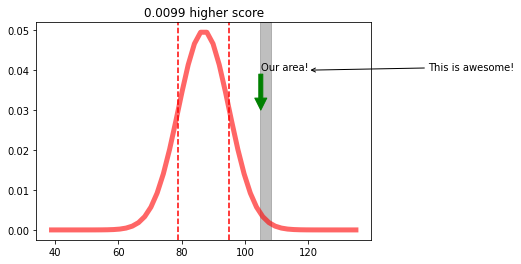

In [198]:
mu=87
std=8
P1=104.6
P2=108.2
z_score_P1 = norm.cdf(x=P1,loc=mu, scale=std)
z_score_P2 = norm.cdf(x=P2,loc=mu, scale=std)
fig, ax = plt.subplots(1, 1)
x = np.linspace(int(mu-(6*std)), mu + int(6*std))
ax.plot(x, norm.pdf(x=x,loc=mu, scale=std), 'r-', lw=5, alpha=0.6, label='norm pdf')
ax.axvspan(P1, P2, alpha=0.5, color='grey')
ax.axvline(int(mu-(1*std)), color='r', linestyle='--')
ax.axvline(mu + int(1*std), color='r', linestyle='--')
plt.title(f"{(z_score_P2-z_score_P1):0.4f} higher score")
plt.annotate('Our area!', xy=(105,0.03), xytext=(105,0.04), arrowprops={'color': 'g'})
plt.annotate('This is awesome!', 
             xy=(120,0.04),  
             xycoords='data',
             textcoords='offset points',
             arrowprops=dict(arrowstyle="->"))
print(f"z_score {P2} {z_score_P2:0.4f},z_score_ {P1} {z_score_P1:0.4f}")
print(f"The area between is z_score {P2} - z_score_ {P1} == {z_score_P2-z_score_P1}")

A set of average city temperatures in September are normally distributed with a mean of $21.02 ^\circ \text{C}$
 and a standard deviation of $2 ^\circ \text{C}$.
What proportion of temperatures are between $17.02^\circ \text{C}$ and $25^\circ \text{C}$?

z_score 25 0.9767,z_score_ 17.02 0.0228
The area between is z_score 25 - z_score_ 17.02 == 0.9539544003016089


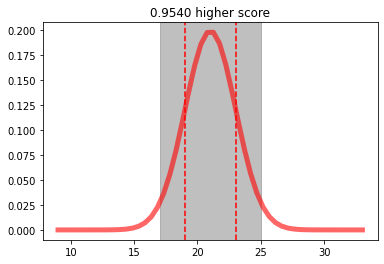

In [178]:
mu=21.02
std=2
P1=17.02
P2=25
z_score_P1 = norm.cdf(x=P1,loc=mu, scale=std)
z_score_P2 = norm.cdf(x=P2,loc=mu, scale=std)
fig, ax = plt.subplots(1, 1)
x = np.linspace(int(mu-(6*std)), mu + int(6*std))
ax.plot(x, norm.pdf(x=x,loc=mu, scale=std), 'r-', lw=5, alpha=0.6, label='norm pdf')
ax.axvspan(P1, P2, alpha=0.5, color='grey')
ax.axvline(int(mu-(1*std)), color='r', linestyle='--')
ax.axvline(mu + int(1*std), color='r', linestyle='--')
plt.title(f"{(z_score_P2-z_score_P1):0.4f} higher score")

print(f"z_score {P2} {z_score_P2:0.4f},z_score_ {P1} {z_score_P1:0.4f}")
print(f"The area between is z_score {P2} - z_score_ {P1} == {z_score_P2-z_score_P1}")

A set of mathematics exam scores are normally distributed with a mean of 80.2 points 
and a standard deviation of 4 points.
What proportion of exam scores are between 82 and 85.6 points?

z_score 85.6 0.9115,z_score_ 82 0.6736
The area between is z_score 85.6 - z_score_ 82 == 0.237847228850518


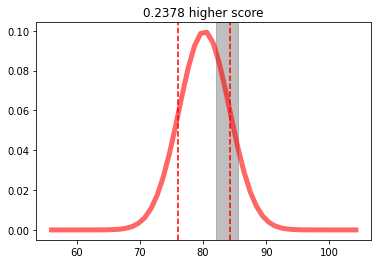

In [61]:
mu=80.2
std=4
P1=82
P2=85.6
z_score_P1 = norm.cdf(x=P1,loc=mu, scale=std)
z_score_P2 = norm.cdf(x=P2,loc=mu, scale=std)
fig, ax = plt.subplots(1, 1)
x = np.linspace(int(mu-(6*std)), mu + int(6*std))
ax.plot(x, norm.pdf(x=x,loc=mu, scale=std), 'r-', lw=5, alpha=0.6, label='norm pdf')
ax.axvspan(P1, P2, alpha=0.5, color='grey')
ax.axvline(int(mu-(1*std)), color='r', linestyle='--')
ax.axvline(mu + int(1*std), color='r', linestyle='--')
plt.title(f"{(z_score_P2-z_score_P1):0.4f} higher score")

print(f"z_score {P2} {z_score_P2:0.4f},z_score_ {P1} {z_score_P1:0.4f}")
print(f"The area between is z_score {P2} - z_score_ {P1} == {z_score_P2-z_score_P1}")

In [51]:
print(norm.cdf(x=13, loc=12, scale=1.5),
norm.cdf(x=15, loc=14, scale=1))

0.7475074624530771 0.8413447460685429


The distribution of annual profit at a chain of stores 
was approximately normal with mean $\mu = \$66{,}000$ and standard deviation $\sigma = \$21{,}000$.
The executives conducted an audit of the stores with the lowest 20% of profits.
What is closest to the maximum annual profit at a store where the executives conducted an audit?

Text(0.5, 1.0, '48325.9541 maximum profit')

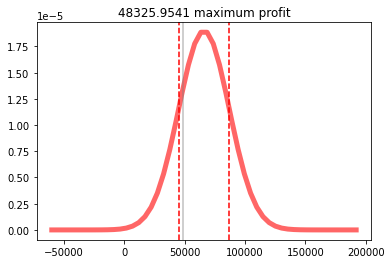

In [59]:
mu=66000
std=21000
P=0.2
z_score_P1 = norm.ppf(P, loc=mu, scale=std)
fig, ax = plt.subplots(1, 1)
x = np.linspace(int(mu-(6*std)), mu + int(6*std))
ax.plot(x, norm.pdf(x=x,loc=mu, scale=std), 'r-', lw=5, alpha=0.6, label='norm pdf')
ax.axvline(z_score_P1, alpha=0.5, color='grey')
ax.axvline(int(mu-(1*std)), color='r', linestyle='--')
ax.axvline(mu + int(1*std), color='r', linestyle='--')
plt.title(f"{(z_score_P1):0.4f} maximum profit")


The distribuition of resting pulse rates of all studens at Santa  Maria high school was approximatedly normal with mean $\mu =80$ beats per minute and standard deviation $\sigma = 9$ beats per minute.     
The school nurse plans to provide additional screning to students whose resting pulse rates are in  the top 30% of the students who were tested.     
What is the minimum resting pulse rate at that school for students who will receive additional screening? 

In [182]:
mu=80
std=9
percentage=0.7 # pegadinha top 30 são 70%
z_score = norm.ppf(percentage) # ppf converte o percentagem em z-score, sem usar a tabela
print(z_score, std*z_score+80)


0.5244005127080407 84.71960461437237


In [184]:
mu=185
std=11
percentage=0.1 #
z_score = norm.ppf(percentage) # ppf converte o percentagem em z-score, sem usar a tabela
print(z_score, std*z_score+mu)

-1.2815515655446004 170.9029327790094


In [185]:
mu=185
std=11
percentage=0.75 # pegadinha top 30 são 70%
z_score = norm.ppf(percentage) # ppf converte o percentagem em z-score, sem usar a tabela
print(z_score, std*z_score+mu)


0.6744897501960817 192.4193872521569


In [186]:
mu=185
std=11
percentage=0.1 # pegadinha top 30 são 70%
z_score = norm.ppf(percentage) # ppf converte o percentagem em z-score, sem usar a tabela
print(z_score, std*z_score+mu)

-1.2815515655446004 170.9029327790094


In [187]:
mu=66000
std=22000
percentage=0.95 # pegadinha top 5 são 95%
z_score = norm.ppf(percentage) # ppf converte o percentagem em z-score, sem usar a tabela
print(z_score, std*z_score+mu)

1.6448536269514722 102186.77979293239


In [60]:
norm.sf(x=23.9, loc=20.8, scale=3.1)

0.15865525393145719

The distribution of reading scale scores in the $4^\text{th}$
 grade at Roosevelt Elementary School was approximately normal with mean $\mu = 221$ and standard deviation $\sigma = 36$.     
Students must score in the top 20% percent to be eligible for participation in the gifted .    
What is the minimum reading scale score for students to be eligible for the gifted program?

In [43]:
mu=221
std=36
percentage=0.8 # pegadinha top 20 são 80%
z_score = norm.ppf(percentage) # ppf converte o percentagem em z-score, sem usar a tabela
print(z_score, std*z_score+mu)

0.8416212335729143 251.2983644086249


The lifespans of gorillas in a particular zoo are normally distributed.    
The average gorilla lives 16 years; the standard deviation is 1.7 years.
Use the empirical rule $(68-95-99.7\%)$ to estimate the probability of a gorilla living between 14.3 and 19.4 years. 

z_score 19.4 0.9772,z_score_ 14.3 0.1587
The area between is z_score 19.4 - z_score_ 14.3 == 81.9 %


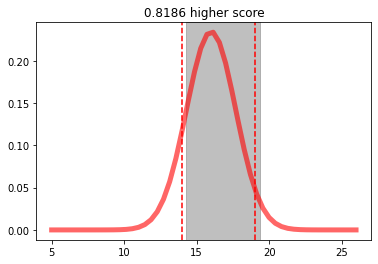

In [48]:
mu=16
std=1.7
P1=14.3
P2=19.4
z_score_P1 = norm.cdf(x=P1,loc=mu, scale=std)
z_score_P2 = norm.cdf(x=P2,loc=mu, scale=std)
fig, ax = plt.subplots(1, 1)
x = np.linspace(int(mu-(6*std)), mu + int(6*std))
ax.plot(x, norm.pdf(x=x,loc=mu, scale=std), 'r-', lw=5, alpha=0.6, label='norm pdf')
ax.axvspan(P1, P2, alpha=0.5, color='grey')
ax.axvline(int(mu-(1*std)), color='r', linestyle='--')
ax.axvline(mu + int(2*std), color='r', linestyle='--')
plt.title(f"{(z_score_P2-z_score_P1):0.4f} higher score")

print(f"z_score {P2} {z_score_P2:0.4f},z_score_ {P1} {z_score_P1:0.4f}")
print(f"The area between is z_score {P2} - z_score_ {P1} == {((z_score_P2-z_score_P1)*100):0.1f} %")

In [188]:
mu=85
std=29
percentage=0.05 # pegadinha top 5 são 95%
z_score = norm.ppf(percentage) # ppf converte o percentagem em z-score, sem usar a tabela
print(z_score, std*z_score+mu)

-1.6448536269514729 37.29924481840729


## Resistência

Na indústria cerâmica, avalia-se sistematicamente a resistência de amostras de massas cerâmicas, após o processo de queima. Dessas avaliações, sabe-se que certo tipo de massa tem resistência mecânica aproximadamente normal, com média 53 MPa e variância populacional de 16 MPa². Após a troca de alguns fornecedores de matérias- primas, deseja-se verificar se houve alteração na qualidade. Uma amostra de 15 corpos de prova de massa cerâmica acusou média igual a 50 MPa. Qual é a conclusão ao nível de significância de 5%?

### Definição das hipóteses

$$
    H_0: \mu \geq 53\, MPa
$$

$$
    H_1 : \mu < 53 \, MPa
$$

In [94]:
mu=53
n=15
std = np.sqrt(16)
significancia=0.05 # == 95 % == 2 sigma

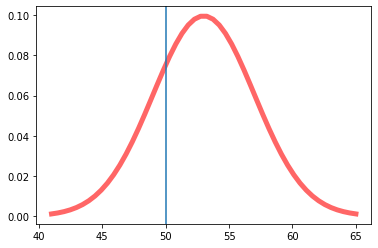

In [97]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(int(mu-(3*std)), mu + int(3*std))
ax.plot(x, norm.pdf(x=x,loc=mu, scale=std), 'r-', lw=5, alpha=0.6, label='norm pdf')
ax.axvline(50)

In [89]:
mu=53
n=15
std = np.sqrt(16)
significancia=0.05 # == 95 % == 2 sigma
z= (50-53)/std
p_value = norm.cdf(z)
print(p_value)
if p_value < significancia:
    print("Rejeição da H_0!")
else:
    print("Falha em rejeitar H_0!")

0.2266273523768682
Falha em rejeitar H_0!


______

## Confiança Instrumental

Os multímetros são aparelhos de medição bastante utilizados. Em um lote de amostras para verificação da qualidade, testaram-se 18 válvulas com o multímetro, para determinar sua tensão. O valor médio amostral encontrado para a tensão foi de 3,2 μV.

a) Construa um intervalo de confiança para a tensão média, com nível de confiança de 98%, sabendo que o fabricante das bobinas garante que as tensões são distribuídas segundo uma normal, com variância populacional igual a 3 μV. (Lembre-se que a variância é o quadrado do desvio padrão!)

b) Caso a variância não fosse conhecida, como você procederia para construir o intervalo de confiança?

In [189]:
n=18
mu=3.2
std=np.sqrt(3)
print(n,mu,std)

18 3.2 1.7320508075688772


In [64]:
from scipy.stats import t as t_student
n= 18
variancia = 3
graus_de_liberdade = n - 1
std = np.sqrt(variancia)
media_amostral = 3.2
confianca = 0.98
significancia = 1 - confianca
print('Intervalo de confiança da média:', t_student.interval(confianca, loc=media_amostral, scale=sigma/np.sqrt(n), df=graus_de_liberdade))


Intervalo de confiança da média: (2.1520535894127537, 4.247946410587247)


In [85]:
#talvez usando normal e com mean 0 e o significancia 0.02 ?
mu, sigma = 3.2, 0.02 # mean and standard deviation
s = np.random.normal(mu, significancia)
print('Intervalo de confiança da média:', t_student.interval(confianca, loc=s, scale=sigma/np.sqrt(n), df=graus_de_liberdade))

Intervalo de confiança da média: (3.174350463485622, 3.1803179230941776)


______